# Car Price Prediction using a Random Forest Regressor

 Author: Preethi Evelyn Sadanandan

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import linear_model

In [2]:
#loading data
raw_data = pd.read_csv('train.csv')

### Summary stats

In [3]:
#Displaying training data
raw_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Understanding the features

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
raw_data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
#Removing outliers
q = raw_data['Price'].quantile(0.99)
data = raw_data[raw_data['Price']<q]
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.904100e+04,19041.000000,19041.000000,19041.000000,19041.000000
mean,4.558293e+07,16093.007510,2010.864555,4.569245,6.562681
std,9.052741e+05,14709.166834,5.644919,1.183281,4.315106
min,2.074688e+07,1.000000,1939.000000,1.000000,0.000000
25%,4.570195e+07,5175.000000,2009.000000,4.000000,4.000000
50%,4.577236e+07,12858.000000,2012.000000,4.000000,6.000000
75%,4.580200e+07,21950.000000,2014.000000,4.000000,12.000000
max,4.581665e+07,83891.000000,2020.000000,16.000000,16.000000


In [7]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Text(0.5, 1.0, 'Price vs. No of cylinders')

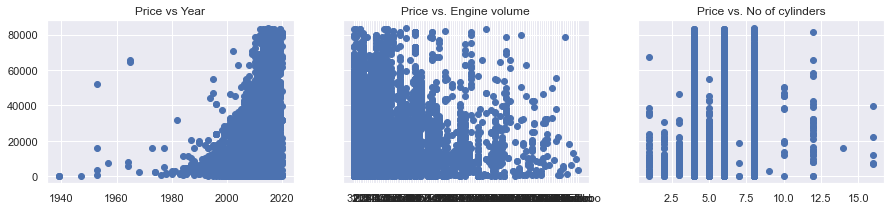

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Prod. year'], data['Price'])
ax1.set_title('Price vs Year')
ax2.scatter(data['Engine volume'], data['Price'])
ax2.set_title('Price vs. Engine volume')
ax3.scatter(data['Cylinders'], data['Price'])
ax3.set_title('Price vs. No of cylinders')

### Feature engineering

In [9]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [10]:
#Feature engineering for 'Mileage' variable
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = data['Mileage'].astype(int)
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
#Transforming 'Prod year' to a int type from object
data['Prod. year'] = data['Prod. year'].astype(int)

In [12]:
#Transforming the Doors variables to be easier to work with (must maintain that it is a categorical variable).
data['Doors']=data['Doors'].replace({'04-May':4,'02-Mar':2})
data['Doors']=data['Doors'].astype(str)

### Feature selection

In [13]:
#Based on research found the following variables not necessary to the model
data = data.drop(['ID', 'Levy', 'Doors', 'Color', 'Model'], axis = 1)

In [14]:
# Transform Categorical columns into numeric columns
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
  if data[column].dtype == np.object:
    data[column] = LabelEncoder().fit_transform(data[column]) 
    

In [15]:
#After conducting step-wise backward elimination method manually to select the features of significance on a linear model using statsmodels library
#These were the variables found to be of p-value greater than 0.05, therefore dropped from model
data = data.drop(['Manufacturer', 'Cylinders', 'Leather interior', 'Engine volume', 'Drive wheels', 'Fuel type'], axis = 1)

### Building the model

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
data.head()

,Price,Prod. year,Category,Mileage,Gear box type,Wheel,Airbags
0,13328,2010,4,186005,0,0,12
1,16621,2011,4,192000,2,0,8
2,8467,2006,3,200000,3,1,2
3,3607,2011,4,168966,0,0,0
4,11726,2014,3,91901,0,0,4


In [18]:
targets = data['Price']
inputs = data.drop(['Price'], axis = 1)

In [19]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(inputs, targets, test_size = 0.2, random_state = 42)


In [20]:
from sklearn.metrics import r2_score, mean_squared_log_error

#### Random Forest Regressor Model

In [21]:
#The Random Forrest Regression Model
forr = RandomForestRegressor(max_depth=5, random_state=0)
forr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [22]:
y_hat_cv = (forr.predict(x_cv))

In [23]:
print('The RMSLE for the cross-validation set is = ',np.sqrt(mean_squared_log_error(y_cv, y_hat_cv)))

The RMSLE for the cross-validation set is =  1.3911499351162424


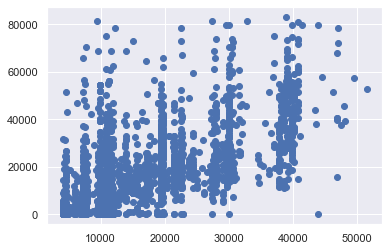

In [24]:
plt.scatter(y_hat_cv, y_cv)
plt.show()

### Predicting on the test data

In [25]:
x_test = pd.read_csv('test.csv')

In [26]:
x_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [27]:
x_test = x_test.drop(['ID', 'Levy', 'Doors', 'Price', 'Model', 'Color'], axis = 1)
x_test = x_test.drop(['Manufacturer', 'Cylinders', 'Leather interior', 'Engine volume', 'Drive wheels', 'Fuel type'], axis = 1)
x_test.head()

,Prod. year,Category,Mileage,Gear box type,Wheel,Airbags
0,2012,Hatchback,0 km,Manual,Left wheel,10
1,2012,Sedan,26000 km,Tiptronic,Left wheel,10
2,2005,Sedan,168000 km,Automatic,Right-hand drive,8
3,2012,Jeep,143000 km,Automatic,Left wheel,12
4,1993,Hatchback,200000 km,Manual,Left wheel,0


In [28]:
# Transform Categorical columns into numeric columns
from sklearn.preprocessing import LabelEncoder

for column in x_test.columns:
  if x_test[column].dtype == np.object:
    x_test[column] = LabelEncoder().fit_transform(x_test[column]) 
    

In [29]:
y_hat =np.abs(forr.predict(x_test))

In [30]:
df = pd.DataFrame(y_hat, index = None, columns = ["Price"])
df.head()

,Price
0,19466.974104
1,21527.762232
2,10988.123407
3,7527.917648
4,7196.255889


In [31]:
sub_test = df.to_csv('submission_randomforrest.csv', index = False)

In [32]:
check = pd.read_csv('submission_randomforrest.csv')
check.head()

,Price
0,19466.974104
1,21527.762232
2,10988.123407
3,7527.917648
4,7196.255889


In [33]:
check.shape

(8245, 1)

In [34]:
### Random Forest Regressor
The RMSLE on the test data set = 1.45
while on the cross-validation set = 1.39

SyntaxError: invalid syntax (<ipython-input-34-6627b9b994cf>, line 2)